<a href="https://colab.research.google.com/github/Alex-So-Ma/Deep_Learning/blob/main/IAF_Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=3 color='blue'>
    
# <center> Tarea 1,  fecha de entrega: febrero 17 del 2023 </center>

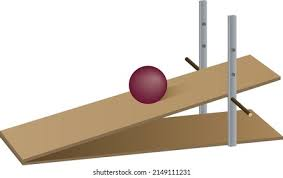

<font size=4>En esta tarea vamos a realizar el ajuste de parámetros para describir la naturaleza del plano inclinado, el cual, como físicos, sabemos que es un problema de **Movimiento Uniformemente Acelerado**. Dado un conjunto de muestras experimentales, pondrás a prueba  tu "intuición física", para determinar los valores apropiados de los pesos y el bias, para obtener el mínimo error posible dada una función F(X,$\vec{W}$, b) que propongas para describir el problema.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de función para obtener los datos experimentales

In [ ]:
# Esta función genera un conjunto de datos que simulan
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):

    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero)
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance

    """

    # n_points es el número de puntos que serán generados

    x = np.random.random(n_points) * measuring_time

    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time

    error = np.random.randn(n_points) * max_distance_error

    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2/2 + error

    return x, y

## Declaración de parámetros de entrada para describir el sistema

In [ ]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


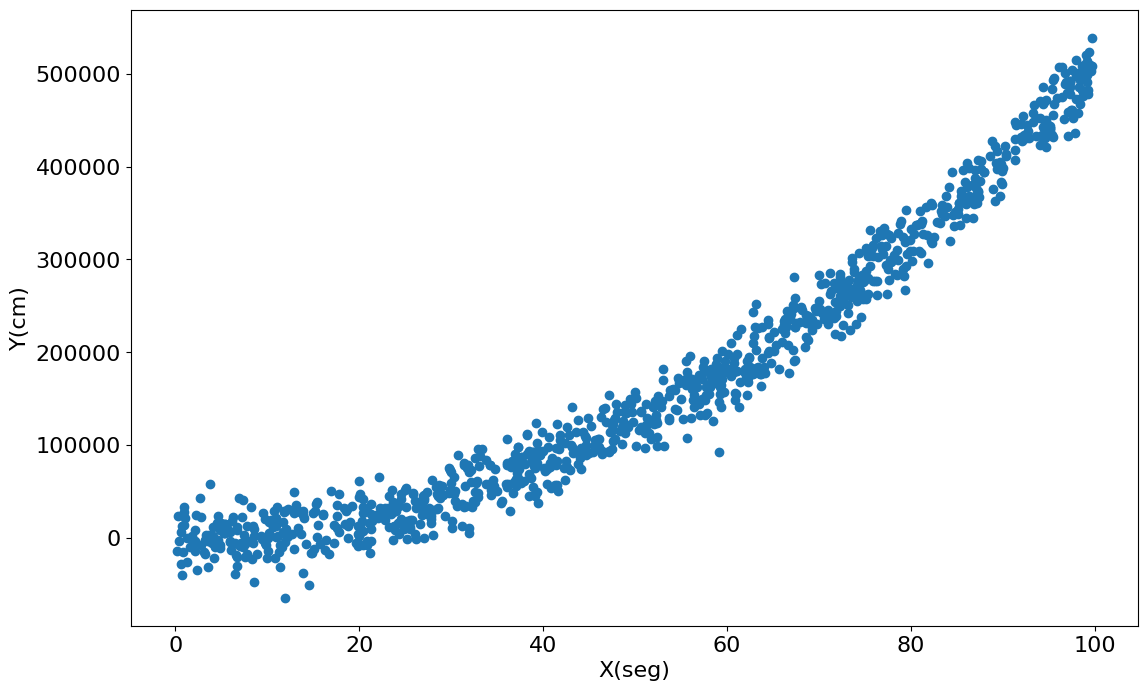

In [ ]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=5 color='blue'>

Proponemos una función o mapeo que nos permita correlacionar los tiempos (X) con la distancia medida (Y)

$$
    F(x, W_0, W_1, b)=W_1x^2+W_0x+b
$$

<font size=4 color=red>Pregunta 1: Inicializa los valores para $W_1, W_0$ y $b$, de la manera en que tú mejor consideres. Recuerda que esto es un "guess" inicial.

In [ ]:
#Initializing the parameter defining the function F

weight1_0 = 80
weight0_0 = 110
bias_0 = 5

<font size=4 color="blue">

Se grafica la correspondiente función $F(X,W,b)$, junto con los puntos que representan a las muestras

In [ ]:
# Function for plotting (x,y) and (x,F(X,W,b))

def plot_x_y_y__(x, y, y_):

    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    #Plotting function
    plt.scatter(x, y_, color='green', lw=4, label='F(X, W, b)')
    plt.legend()

    #Plotting samples
    plt.scatter(x, y)

    plt.show()

<font size=4 color=red>Pregunta 2: Utilizando la función señalada en la celda anterior, construye el arreglo de valores *y_*, los cuales representan los valores de tu función F(X,W,b). Luego, calcula el error cuadrático medio de dicho arreglo con los valores del experimento, *y*. Imprime el resultado y la gráfica

residuo: 19855017955.67


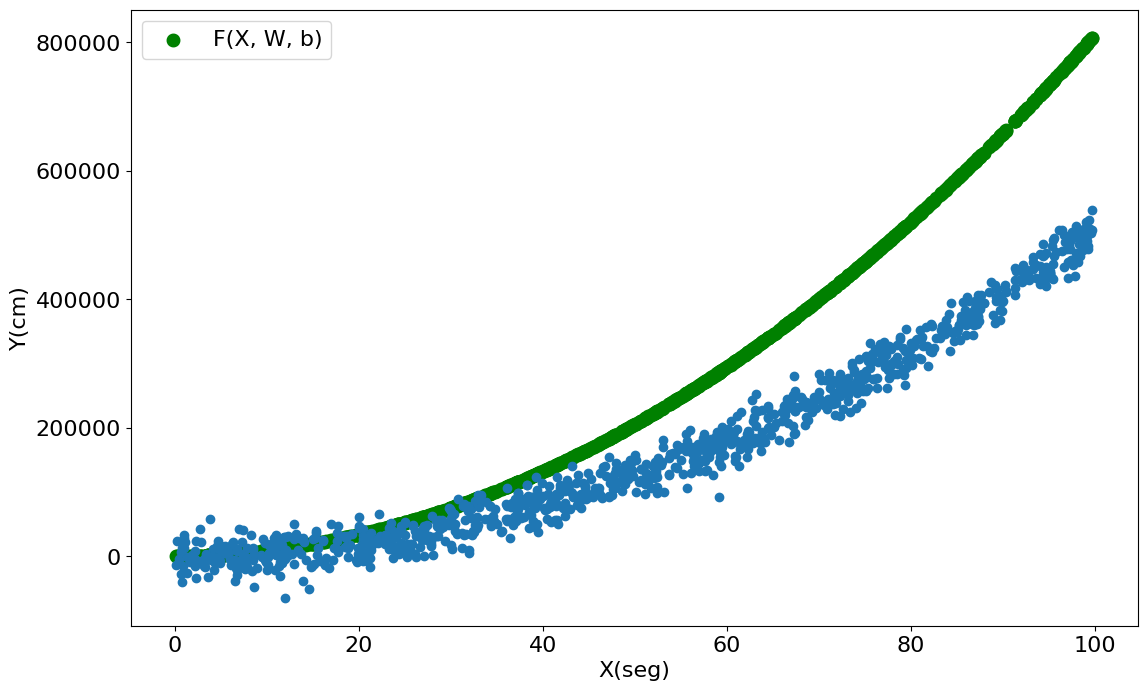

In [ ]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)

y_ = weight1_0*x**2+weight0_0*x + bias_0

# Using the function F, the residuos is calculated by comparing the calculated and measured values

residuo = np.mean((y-y_)**2)

print('residuo: {0:10.2f}'.format( residuo))

plot_x_y_y__(x, y, y_)

<font size=4 color=red>Pregunta 3: Define una función, que se llame **update_weights_biases**, la cual permita actualizar los parámetros $W_1, W_0$ y $b$, dando una delta $\Delta$ de cambio para cada uno de ellos. (HINT: Revisa la función que se definió en la clase 2. No la puedes copiar completamente; debes realizar ciertos ajutes a esa función para este nuevo problema)

In [ ]:
def update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias):

    weight1 = weight1 + delta_weight1

    weight0 = weight0 + delta_weight0

    bias = bias + delta_bias

    #The following date are for constructing the F(x,weight, bias)

    y_ = weight1*x**2 + weight0*x + bias_0

    mse = np.mean((y - y_)**2)

    #print('residuo: {:10.2f}'.format(residuo))

    return weight1, weight0, bias, y_, mse

<font size=4 color=red>Pregunta 4: Realiza una gráfica, actualizando los valores de los pesos y los bias, con el delta de cambio que tú consideres, para los 3 parámetros involucrados. Utiliza la función *plot_x_y_y__* para mostrar el resultado

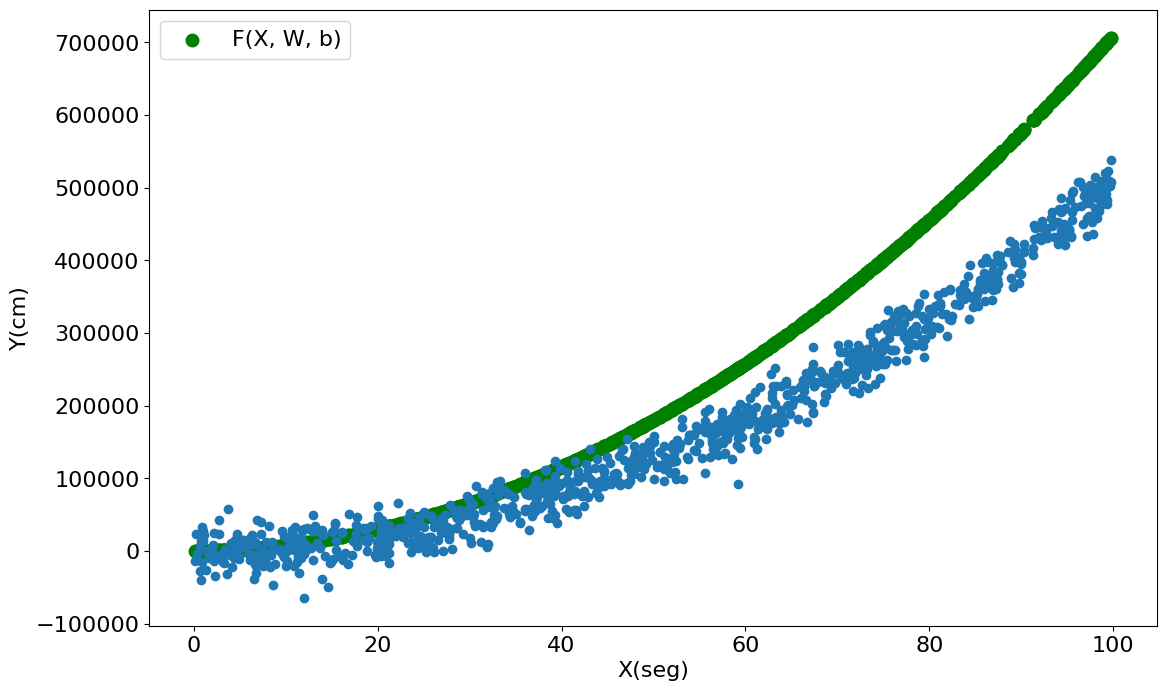

In [ ]:
weight1 = weight1_0
weight0 = weight0_0
bias = bias_0
delta_weight1 = -10.0
delta_weight0 = -10.0
delta_bias = 15.0

weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias)
plot_x_y_y__(x, y, y_)

<font size=4 color=red>Pregunta 5: Construye un ciclo *for*, el cual realizará 120 veces la actualización de los parámetros de tu función F(X,W,b). Comienza con la actualización del parámetros $W_1$; define un cambio para este parámetro mencionado, y deja en 0 las deltas de los demás. Imprime el resultado de los pesos, el bias y el error MSE para cada 10 iteraciones. Los resultados de tus actualizaciones los debes guardar en una variable, que se va a llamar **update_outputs**, la cual será una lista, cuyos elementos también serán listas, que contienen a su vez, en el orden indicado, $W_1$, $W_0$, bias, **y_** y el error MSE

In [ ]:
update_outputs = []

weight1 = weight1_0
weight0 = weight0_0
bias = bias_0
delta_weight1 = -1.0
delta_weight0 = 0
delta_bias = 0
iterations = 120

for i in range(iterations):

    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias)

    update_outputs.append([weight1, weight0, bias, y_, mse])

    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1,weight0,bias,mse))
            #print(weight1,weight0,bias,mse)

weight1:    79.00   weight0:   110.00    bias:  5.00   MSE: 18624475984.48
weight1:    69.00   weight0:   110.00    bias:  5.00   MSE: 8529661209.14
weight1:    59.00   weight0:   110.00    bias:  5.00   MSE: 2454128136.69
weight1:    49.00   weight0:   110.00    bias:  5.00   MSE: 397876767.13
weight1:    39.00   weight0:   110.00    bias:  5.00   MSE: 2360907100.45
weight1:    29.00   weight0:   110.00    bias:  5.00   MSE: 8343219136.66
weight1:    19.00   weight0:   110.00    bias:  5.00   MSE: 18344812875.75
weight1:     9.00   weight0:   110.00    bias:  5.00   MSE: 32365688317.72
weight1:    -1.00   weight0:   110.00    bias:  5.00   MSE: 50405845462.58
weight1:   -11.00   weight0:   110.00    bias:  5.00   MSE: 72465284310.33
weight1:   -21.00   weight0:   110.00    bias:  5.00   MSE: 98544004860.96
weight1:   -31.00   weight0:   110.00    bias:  5.00   MSE: 128642007114.48


<font size=4 color=red>Pregunta 6: Realiza las gráficas para algunos de los parámetros que actualizaste y guardaste en la lista **update_outputs**. Puedes realizar el mismo ciclo *for* que señalamos en la notebook de la clase 2

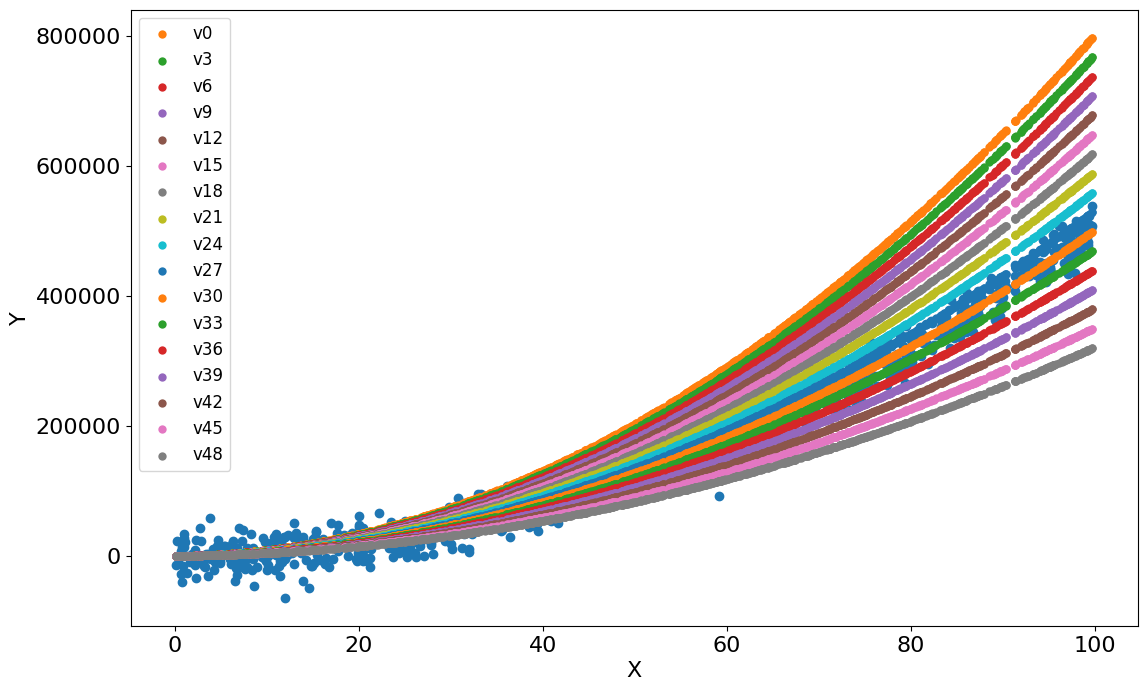

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)

for i in range(0,50,3):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i), linewidths=0.0001)
    plt.legend()

plt.show()

<font size=4 color=red> Pregunta 7: Realiza la gráfica de $W_1$ vs MSE. (HINT: Declara una lista vacía en la que guardes los pesos W1, y otra donde guardes los errores MSE. Estas listas las vas a ir llenando con los valores que guardaste en **update_outputs**. Revisa la clase 2 para que veas cómo se realiza este proceso. Ten cuidado con los índices)

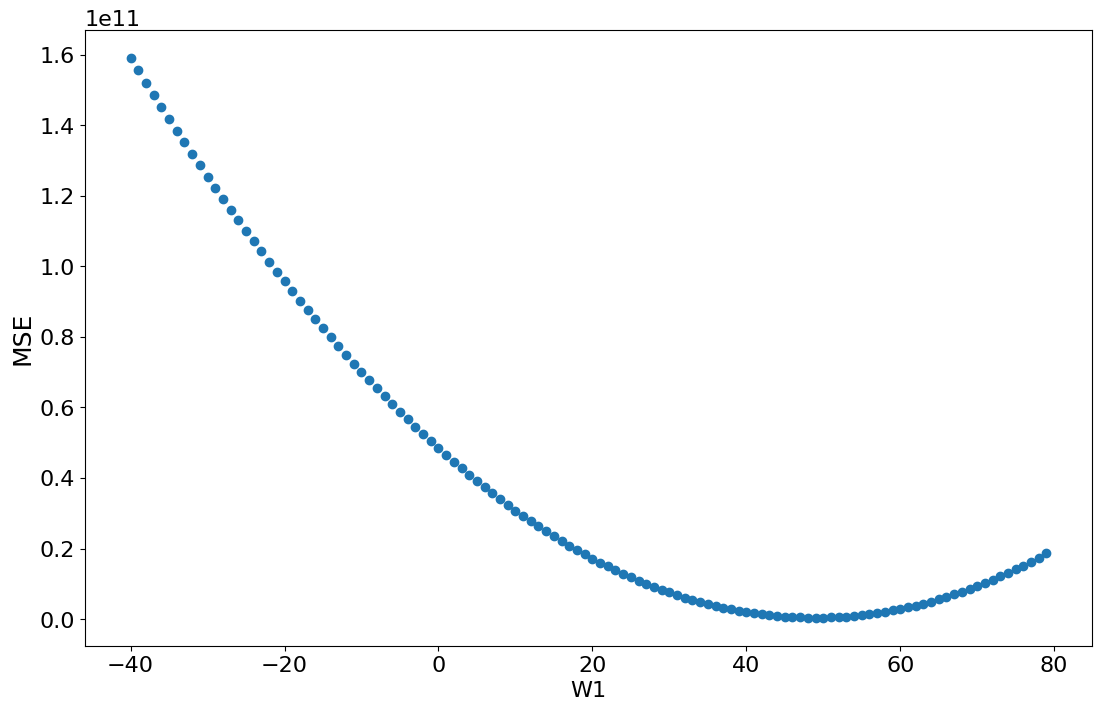

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W1', fontsize=16)

weights1 = []

#update_outputs=[[w0,b0,y_0,mse_0], [w1,b1,y_1,mse_1],....[]]

mse = []

for update_output in update_outputs:
    #update_output=[w0.b0,y_0,mse_0]

    weights1.append(update_output[0])

    mse.append(update_output[4])

    #weights=[w0]
    #mse=[mse_0]
plt.scatter(weights1, mse)


plt.show()

<font size=4 color=red> Pregunta 8: Señala el error más bajo obtenido, así como los mejores parámetros que llevan a este resultado del error mínimo

In [ ]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
w0_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 397876767.13
Los valores optimos de los parámetros son W1 = 49.00, W0 = 110.00 y b =  5.00 


<font size=4 color=red>Pregunta 9: Realiza los mismos procedimientos que desarrollaste en las preguntas 5 a la 8, pero ahora actualizando el valor $W_0$

In [ ]:
update_outputs = []

weight1 = w1_opt
weight0 = weight0_0
bias = bias_0
delta_weight1 = 0
delta_weight0 = -1.0
delta_bias = 0
iterations = 120

for i in range(iterations):

    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias)

    update_outputs.append([weight1, weight0, bias, y_, mse])

    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1,weight0,bias,mse))
            #print(weight1,weight0,bias,mse)

weight1:    49.00   weight0:   109.00    bias:  5.00   MSE: 397756396.92
weight1:    49.00   weight0:    99.00    bias:  5.00   MSE: 396922810.14
weight1:    49.00   weight0:    89.00    bias:  5.00   MSE: 396762160.28
weight1:    49.00   weight0:    79.00    bias:  5.00   MSE: 397274447.33
weight1:    49.00   weight0:    69.00    bias:  5.00   MSE: 398459671.29
weight1:    49.00   weight0:    59.00    bias:  5.00   MSE: 400317832.16
weight1:    49.00   weight0:    49.00    bias:  5.00   MSE: 402848929.94
weight1:    49.00   weight0:    39.00    bias:  5.00   MSE: 406052964.64
weight1:    49.00   weight0:    29.00    bias:  5.00   MSE: 409929936.25
weight1:    49.00   weight0:    19.00    bias:  5.00   MSE: 414479844.77
weight1:    49.00   weight0:     9.00    bias:  5.00   MSE: 419702690.20
weight1:    49.00   weight0:    -1.00    bias:  5.00   MSE: 425598472.55


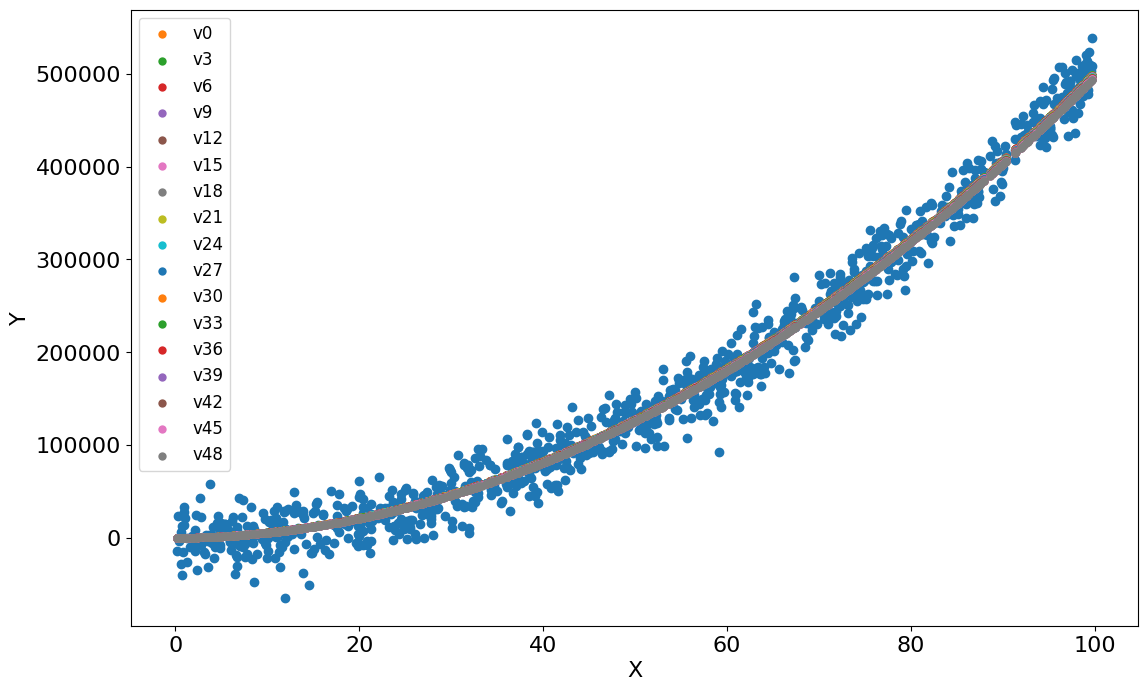

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)

for i in range(0,50,3):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i), linewidths=0.0001)
    plt.legend()

plt.show()

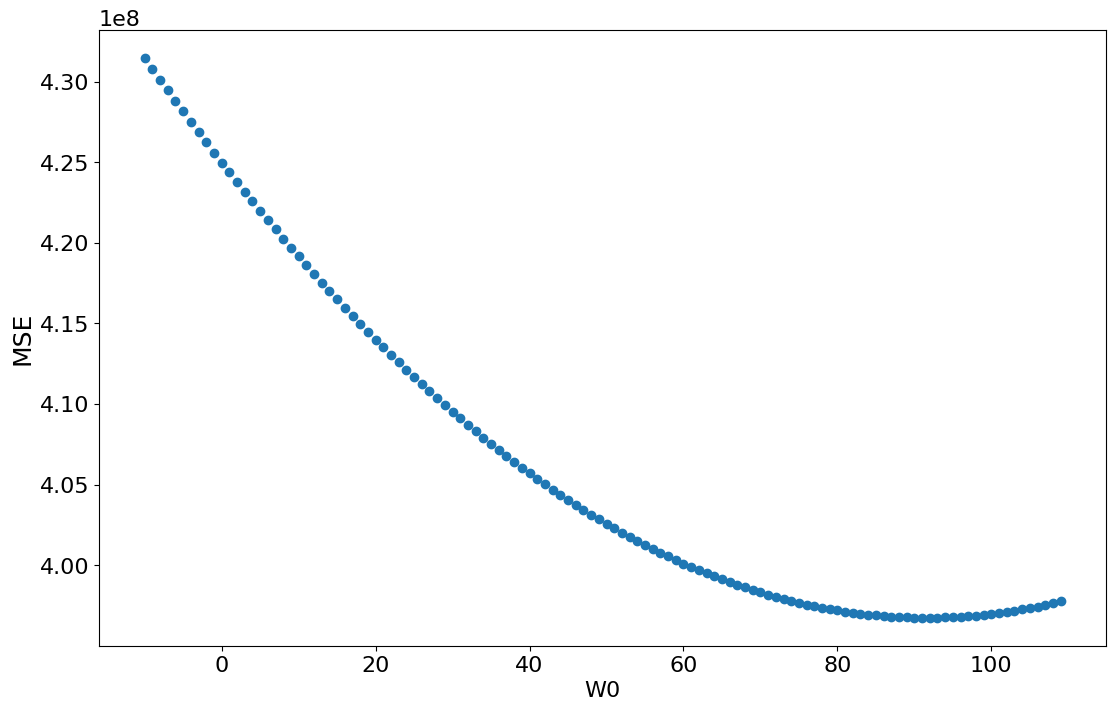

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W0', fontsize=16)

weights0 = []

mse = []

for update_output in update_outputs:

    weights0.append(update_output[1])

    mse.append(update_output[4])
plt.scatter(weights0, mse)


plt.show()

In [ ]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
w0_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 396739696.86
Los valores optimos de los parámetros son W1 = 49.00, W0 = 92.00 y b =  5.00 


<font size=4 color=red> Pregunta 10: Repite los pasos marcados en la pregunta 9, pero ahora para actualiza el valor de bias

In [ ]:
update_outputs = []

weight1 = w1_opt
weight0 = w0_opt
bias = bias_0
delta_weight1 = 0
delta_weight0 = 0
delta_bias = 1.0
iterations = 120

for i in range(iterations):

    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias)

    update_outputs.append([weight1, weight0, bias, y_, mse])

    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1,weight0,bias,mse))
            #print(weight1,weight0,bias,mse)

weight1:    49.00   weight0:    92.00    bias:  6.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 16.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 26.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 36.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 46.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 56.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 66.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 76.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 86.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 96.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 106.00   MSE: 396739696.86
weight1:    49.00   weight0:    92.00    bias: 116.00   MSE: 396739696.86


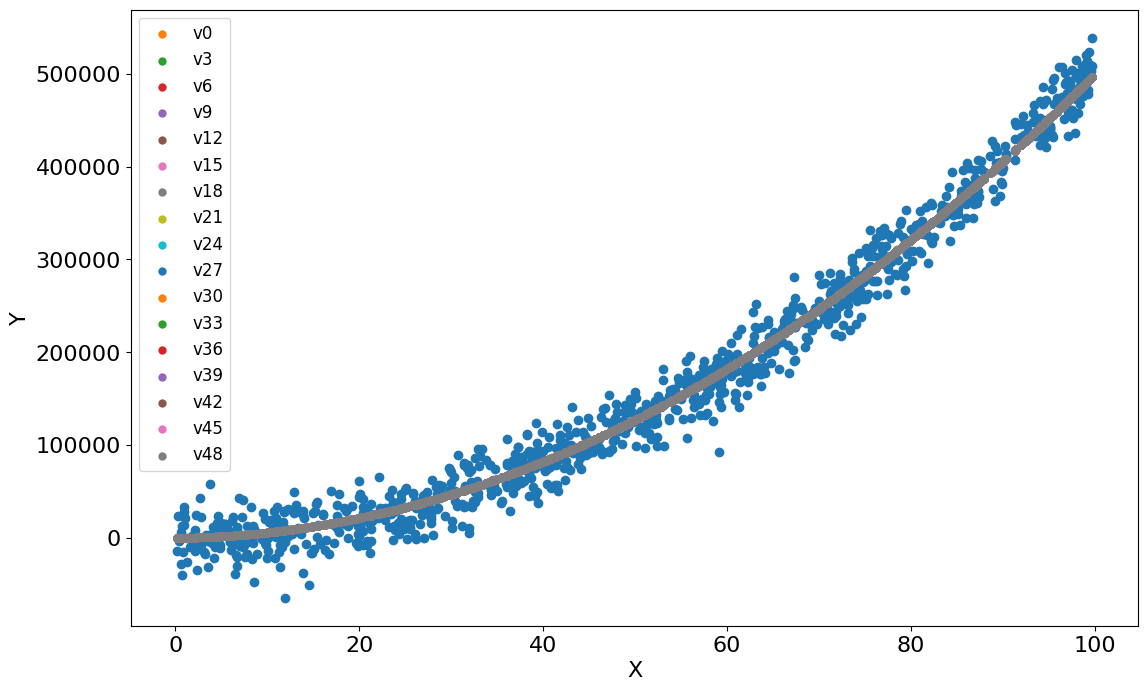

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)

for i in range(0,50,3):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i), linewidths=0.0001)
    plt.legend()

plt.show()

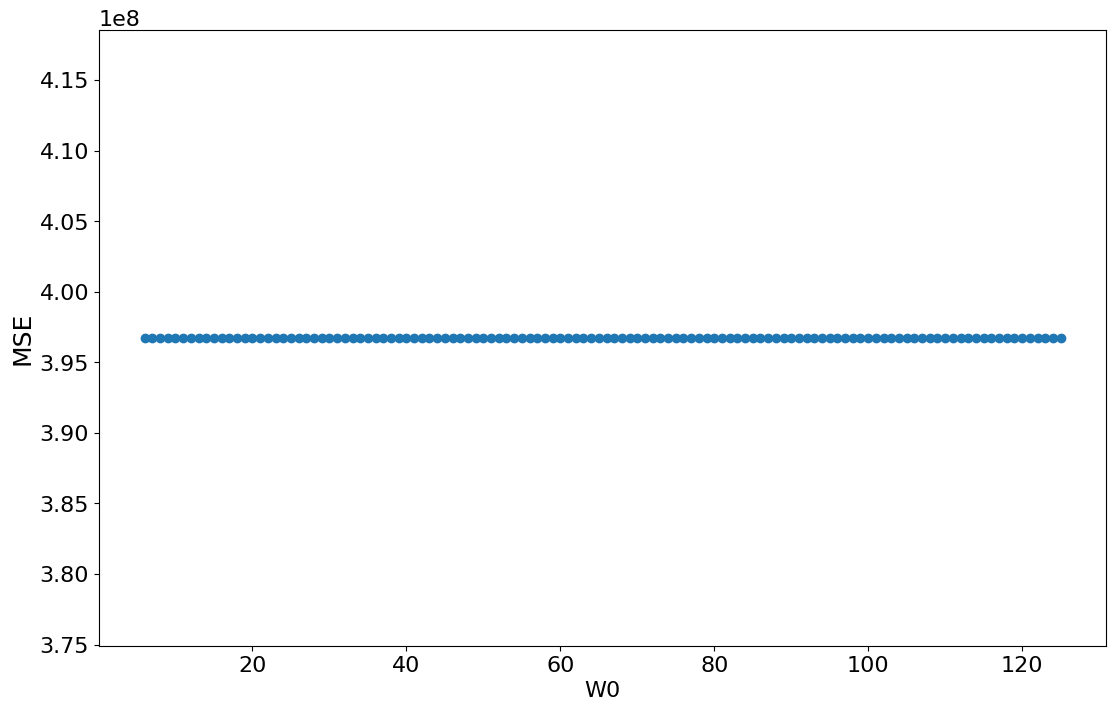

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W0', fontsize=16)

biases = []

mse = []

for update_output in update_outputs:

    biases.append(update_output[2])

    mse.append(update_output[4])
plt.scatter(biases, mse)


plt.show()

In [ ]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
w0_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 396739696.86
Los valores optimos de los parámetros son W1 = 49.00, W0 = 92.00 y b =  6.00 


<font size=4 color=red>Pregunta Extra: ¿Qué representa físicamente el valor $W_1$? ¿El ajuste que realizaste se acerca al valor que se indica como referencia? ¿Por qué?

Es la mitad de la aceleración $W_1=\frac{a}{2}$, en este caso teníamos que $a=100$ de manera que el valor deseado era $W_1=50$ y se obtuvo $W_1=49$. O sea, la diferencia entre el valor real y la aproximación es muy bajo.

Por otro lado, los valores de velocidad y distancia inicial quedaron algo lejos de los valores esperados. Esto se le puede atribuir al error tan grande con el que se trabajó.

El error no afectó a la aproximación de la aceleración por la cantidad de datos que se usaron y por el intervalo de tiempo.

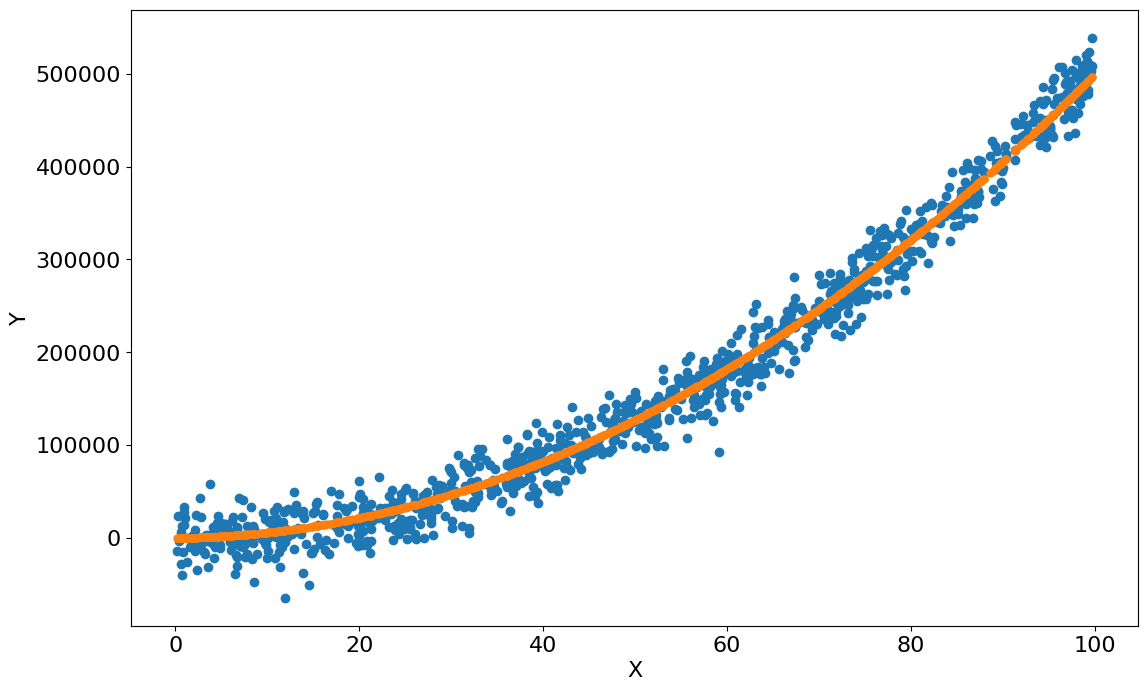

In [ ]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)
plt.scatter(x, w1_opt*x**2 + w0_opt*x + b_opt, label='v' + str(i), linewidths=0.0001)

plt.show()